## **Bangkok Airbnb Listing Analysis with *Python***

### **Latar Belakang**
Airbnb merupakan online marketplace yang menyediakan akomodasi bagi orang-orang yang ingin menyewa ataupun menyewakan kamar pribadi, apartemen, villa, maupun rumahnya.
Pada umumnya, properti yang ditawarkan layanan akomodasi ini dapat disewa secara harian dan harganya ditetapkan oleh pemilik properti.
Airbnb sendiri didirikan pada tahun 2008 oleh Brian Chesky, Nathan Blecharczyk, dan Joe Gebbia. Namanya merupakan kependekan dari nama aslinya, yaitu AirBedandBreakfast.com

Jika kita melihat ke tahun 2000-an awal, mungkin jika ingine memesan hotel atau tempat penginapan maka kita perlu menelfon untuk membookingnya. Kemudian dengan majunya teknologi kita bisa memesan melalui website resmi dari tempat penginapan yang ingin kita kunjungi. Di-era saat ini teknologi sudah sangat maju, sekarang kita hanya membuka satu aplikasi dan bisa memilih beragam tempat penginapan mulai dari lokasi, harga, fasilitas, ataupun hal lainnya.

Dalam kasus kali ini, saya ingin melakukan analisa pada Airbnb di Negara Bangkok. Seperti yang kita ketahui bahwa sebuah perusahaan ingin mendapatkan profit, maka dari itu saya ingin melakukan analisa untuk meningkatkan profit dari data yang dimiliki. Di analisa kali ini saya akan mencari korelasi antara harga, lokasi, atau hal lainnya yang mampu membantu perusahaan dalam membuat keputusan saat melakukan perencanaan strategy.

Beberapa parameter akan digunakan untuk menganalisis data tersebut:
<br>
* Tipe akomodasi mana yang mendapat review paling banyak
* Tipe hunian apa yang jarang direview atau menghasilkan rating yang rendah oleh pengguna
* Tipe-tipe akomodasi apa yang dapat ditemukan di Airbnb
* Di wilayah mana terdapat jumlah akomodasi paling banyak
* Berapa jumlah akomodasi yang telah direview dan belum direview
<br>

## *Data Understanding and Cleaning*

Sebelum memulai analisis, penting untuk melakukan pemahaman yang mendalam terhadap dataset yang akan digunakan dalam tahap data understanding. Dengan melakukan ini, kita dapat mengidentifikasi anomali atau ketidaknormalan dalam dataset yang memerlukan penanganan selama tahap data cleaning. Setiap tindakan penanganan anomali yang diambil harus didukung dengan justifikasi yang kuat, baik berdasarkan pengetahuan domain maupun analisis statistik, untuk memastikan integritas dan kualitas data yang optimal.

| Feature                               | Deskripsi |
|---------------------------------|-----------------------------------------------------------------------------|
| **id**                                    | Code unik yang dimiliki setiap penginapan dengan angka yang berbeda dan unik|
| **name**                                  | Nama tempat penginapan|
| **host_id**                               | Pengenal unik Airbnb untuk tuan rumah/pengguna|
| **Host Name**                             | Merupakan field untuk menampung data pemilik tempat tersebut|
| **neighborhood**                          | Lingkungan sekitar|
| **Latitude & Longitude**                  | Lokasi|
| **Room Type**                             | Tipe penginapan|
| **Price**                                 | Harga|
| **Minimum Nights**                        | Minimum waktu pemesanan|
| **Number of Reviews**                     | Total review dari penginapan|
| **last_review**                           | Tanggal review terbaru|
| **Calculated Host Listings Count**        | Total tempat hunian|
| **availability_365**                      | Kolom yang berisikan ketersediaan kamar yang ada|
| **number_of_reviews_ltm**                 | Jumlah ulasan yang dimiliki daftar (dalam 12 bulan terakhir)|

## **Tujuan**

* Melihat demand based on tipe kamar yang paling banyak ditemukan.
* Dapat membuat forcasting dalam membuat keputusan perusahaan.
* Meningkatkan daya tarik customer.
* Mampu membuat strategy pemasaran yang tepat.



## 1. **Importing Display Airbnb Dataset**
###  (Dataset yang digunakan berupa .csv)    

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

In [2]:
airbnb = pd.read_csv("Airbnb Listings Bangkok.csv")
airbnb

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [3]:
pd.set_option('display.max_colwidth', None) 
listItem = []
for col in airbnb.columns :
    listItem.append( [col, airbnb[col].nunique(), airbnb[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

Dari sini kita bisa menemukan bahwa
* Terdapat kesamaan nilai antara kolom "Tanpa Nama: 0" dan indeks, yang memunculkan kebingungan terhadap informasi yang terkandung di dalamnya.
* Dataset yang ditampilkan tidak memberikan informasi yang komprehensif atau lengkap, meninggalkan kekurangan data yang mungkin mengganggu analisis.
* Beberapa daftar akomodasi tidak mencantumkan nama, menimbulkan ketidakjelasan mengenai identitas masing-masing akomodasi.
* Adanya nilai NaN pada kolom last_review dan review_per_month mengindikasikan bahwa beberapa akomodasi mungkin tidak pernah mendapatkan ulasan atau ulasan per bulan tidak tersedia.
* Beberapa akomodasi memiliki ketersediaan yang ditetapkan sebagai 0, menandakan bahwa akomodasi tersebut tidak dapat disewa pada waktu tertentu, yang dapat mempengaruhi keseluruhan analisis ketersediaan akomodasi.

In [4]:
airbnb.info() # Melihat info dari data yang ingin kita olah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

## Data Cleaning

### Duplicated Data

In [5]:
airbnb.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
#Pembuatan kolom baru sehingga mudah untuk dilihat

#Mengubah tipe data pada last review menjadi datetime
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])

# Menambah data (month) dari last review
airbnb['last_review(Month)'] = airbnb['last_review'].dt.month

## Menambah data (year) dari last review
airbnb['last_review(Year)'] = airbnb['last_review'].dt.year

In [7]:
#Melakukan pengecheck-an "Unamed:0" sudah terhapus atau belum
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

In [8]:
#Mencari data yang duplikat
data_duplicate = airbnb[airbnb.duplicated(subset=['longitude', 'latitude','last_review','price','name','room_type'])]
display(len(data_duplicate))
data_duplicate

14

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,NaT,NaN,9,361,0,NaN,NaN
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,NaT,NaN,4,180,0,NaN,NaN
15121,767128654727724698,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaT,NaN,13,339,0,NaN,NaN
15144,767945912006659422,Sathon Luxury Loft/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaT,NaN,40,339,0,NaN,NaN
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,44,340,0,NaN,NaN
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,40,340,0,NaN,NaN
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,40,340,0,NaN,NaN
15192,765728211212001811,Sathon Luxury 2 br/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,13,340,0,NaN,NaN
15195,765781484209218358,Sathon Luxury 2 br/China Town/Icon Siam,20133201,Willam,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,33,340,0,NaN,NaN
15371,775777794097427183,New! Gateway/ Bangkok University 1BR 2PPL near BTS,52161947,Noons,Khlong Toei,13.716669,100.584967,Entire home/apt,2976,1,0,NaT,NaN,99,362,0,NaN,NaN


In [9]:
airbnb.drop_duplicates(subset=['longitude', 'latitude','last_review','price','name','room_type'], keep='first', inplace=True, ignore_index=False)

### **Mising Value**

In [10]:
airbnb.isna().sum()#Melihat data yang missing di setiap kolom

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5776
reviews_per_month                 5776
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
last_review(Month)                5776
last_review(Year)                 5776
dtype: int64

In [11]:
airbnb.isna().sum()/len(airbnb)*100 #Melihat rasio terhadap data yang missing

id                                 0.000000
name                               0.050505
host_id                            0.000000
host_name                          0.006313
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.464646
reviews_per_month                 36.464646
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
last_review(Month)                36.464646
last_review(Year)                 36.464646
dtype: float64

Pada result diatas bisa disimpulkan bahwa
* Ada 6 Kolom yang memiliki missing value
* Host Name hanya terdapat 1 data yang missing dengan presentase 0.006313%
* Kolom (last_review, reviews_per_month, last_review(Month), dan last_review(Year)) memiliki missing value yang sama 

### **Handle Missing Value**

Seperti yang kita ketahui bahwa menghandle missing value terdapat 2 cara:

1.Langsung menghapus baris --> Cara ini mudah dan cepat, tetapi kita bisa kehilangan sumber informasi yang penting juga

2.Mengisi dengan data pada kolom --> Cara ini sedikit kompleks

In [12]:
airbnb['reviews_per_month'].fillna(value=0,inplace=True)
airbnb['last_review(Month)'].fillna(value=0,inplace=True)
airbnb['last_review(Year)'].fillna(value=0,inplace=True)

In [19]:
airbnb.isna().sum()#Lakukan pengecheck-an apakah masih ada missing value

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5776
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
last_review(Month)                   0
last_review(Year)                    0
dtype: int64

In [13]:
airbnb['host_name'] = airbnb['host_name'].fillna('Unknown_name')#Isi NaN pada host_name dengan 'Unknown_name'

In [14]:
airbnb.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5776
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
last_review(Month)                   0
last_review(Year)                    0
dtype: int64


 **Terdapat 8 NaN pada "name"**

In [15]:
airbnb[airbnb['host_name']=='Unknown_name']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)
3571,19682464,Cozy Hideaway,137488762,Unknown_name,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0,7.0,2017.0


In [16]:
airbnb[airbnb['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,0.00,1,365,0,0.0,0.0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,0.00,1,365,0,0.0,0.0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,0.00,1,365,0,0.0,0.0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,0.00,1,365,0,0.0,0.0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,0.00,1,365,0,0.0,0.0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0,5.0,2017.0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,0.00,1,365,0,0.0,0.0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0,12.0,2017.0


In [17]:
nama_host = ['Titawan','Cherry','Parichart','Chira','Nantida','Diamond Bangkok','Khaneungnit','Pakaphol']

airbnb[airbnb['host_name'].isin(nama_host)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.694060,100.596190,Private room,1080,5,0,NaT,0.00,1,365,0,0.0,0.0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.775620,100.573460,Private room,1200,1,0,NaT,0.00,1,365,0,0.0,0.0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.783760,100.498210,Private room,1200,1,0,NaT,0.00,1,365,0,0.0,0.0
669,6148415,NaN,31895202,Chira,Bang Na,13.682760,100.608940,Entire home/apt,2424,2,0,NaT,0.00,1,365,0,0.0,0.0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.741260,100.557610,Private room,5000,3,0,NaT,0.00,1,365,0,0.0,0.0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.753280,100.529280,Private room,930,1,6,2017-05-13,0.07,1,365,0,5.0,2017.0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.717570,100.604640,Private room,1000,1,0,NaT,0.00,1,365,0,0.0,0.0
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.724270,100.564430,Private room,950,1,1,2020-02-19,0.03,3,1,0,2.0,2020.0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.723730,100.564150,Private room,36363,1,0,NaT,0.00,3,1,0,0.0,0.0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.725660,100.564160,Private room,850,1,2,2017-12-11,0.03,3,220,0,12.0,2017.0


In [18]:
airbnb[airbnb['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0,2.0,2020.0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,0.00,3,1,0,0.0,0.0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0,12.0,2017.0


### **2 Data Errday Guest House & 1 NaN**

Maka NaN akan dibubah menjadi Data Errday Guest House

In [19]:
airbnb.loc[airbnb['host_name']=='Pakaphol', 'name'] = airbnb.loc[airbnb['host_name']=='Pakaphol', 'name'].fillna('Errday Guest House')

In [20]:
airbnb[airbnb['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0,2.0,2020.0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,0.00,3,1,0,0.0,0.0
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0,12.0,2017.0


In [21]:
airbnb.dropna(subset=['name'],inplace=True)

### **Mencari Kolom yang memiliki value "0"**

In [22]:
for column in airbnb.columns:
    if 0 in airbnb[column].values:
        print(f"Column {column} has a value of 0.")


Column price has a value of 0.
Column number_of_reviews has a value of 0.
Column reviews_per_month has a value of 0.
Column availability_365 has a value of 0.
Column number_of_reviews_ltm has a value of 0.
Column last_review(Month) has a value of 0.
Column last_review(Year) has a value of 0.


In [23]:
#Menampilkan price 0 
airbnb[airbnb['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaT,0.0,1,0,0,0.0,0.0


In [24]:
#Delete row yang price 0
airbnb = airbnb.drop(airbnb[airbnb['price'] == 0].index)

In [25]:
airbnb[airbnb['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)


### **Mencari Outliers**

<Axes: xlabel='room_type', ylabel='price'>

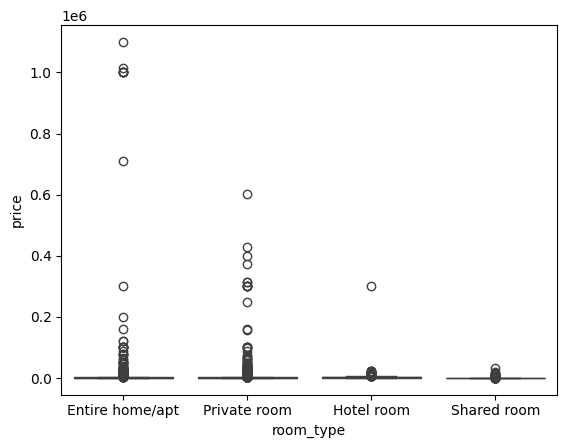

In [26]:
sns.boxplot(data=airbnb,x='room_type',y='price')

### Mencari Outlier pada kolom "price" berdasarkan "room_type"

Tampaknya terdapat titik-titik outlier pada harga properti untuk seluruh rumah/apartemen, kamar pribadi, dan kamar hotel seperti yang terlihat dalam boxplot di atas. Kehadiran outlier tersebut mungkin disebabkan oleh adanya nilai-nilai harga yang jauh lebih tinggi dari rata-rata atau dari nilai-nilai lain dalam dataset.

In [27]:
#Check seluruh data kembali
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15832 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15832 non-null  int64         
 1   name                            15832 non-null  object        
 2   host_id                         15832 non-null  int64         
 3   host_name                       15832 non-null  object        
 4   neighbourhood                   15832 non-null  object        
 5   latitude                        15832 non-null  float64       
 6   longitude                       15832 non-null  float64       
 7   room_type                       15832 non-null  object        
 8   price                           15832 non-null  int64         
 9   minimum_nights                  15832 non-null  int64         
 10  number_of_reviews               15832 non-null  int64         
 11  last_re

### Result dari Data Cleaning ###

Bisa kita lihat bahwa sebelum dilakukan "Data Cleaning" Baris pada rowdata berkurang 22.


In [79]:
airbnbnew = airbnb.to_csv('final_dataset_airbnb',index=False)

In [81]:
airbnbnew = airbnb.to_csv('final_dataset_airbnb.csv',index=False)

## **Data Analysis**

In [29]:
Property_Region = airbnb.groupby('neighbourhood')['neighbourhood'].value_counts().reset_index().sort_values('count',ascending=False)
Property_Region.head()

,neighbourhood,count
47,Vadhana,2149
22,Khlong Toei,2096
18,Huai Khwang,1122
37,Ratchathewi,1113
8,Bang Rak,827


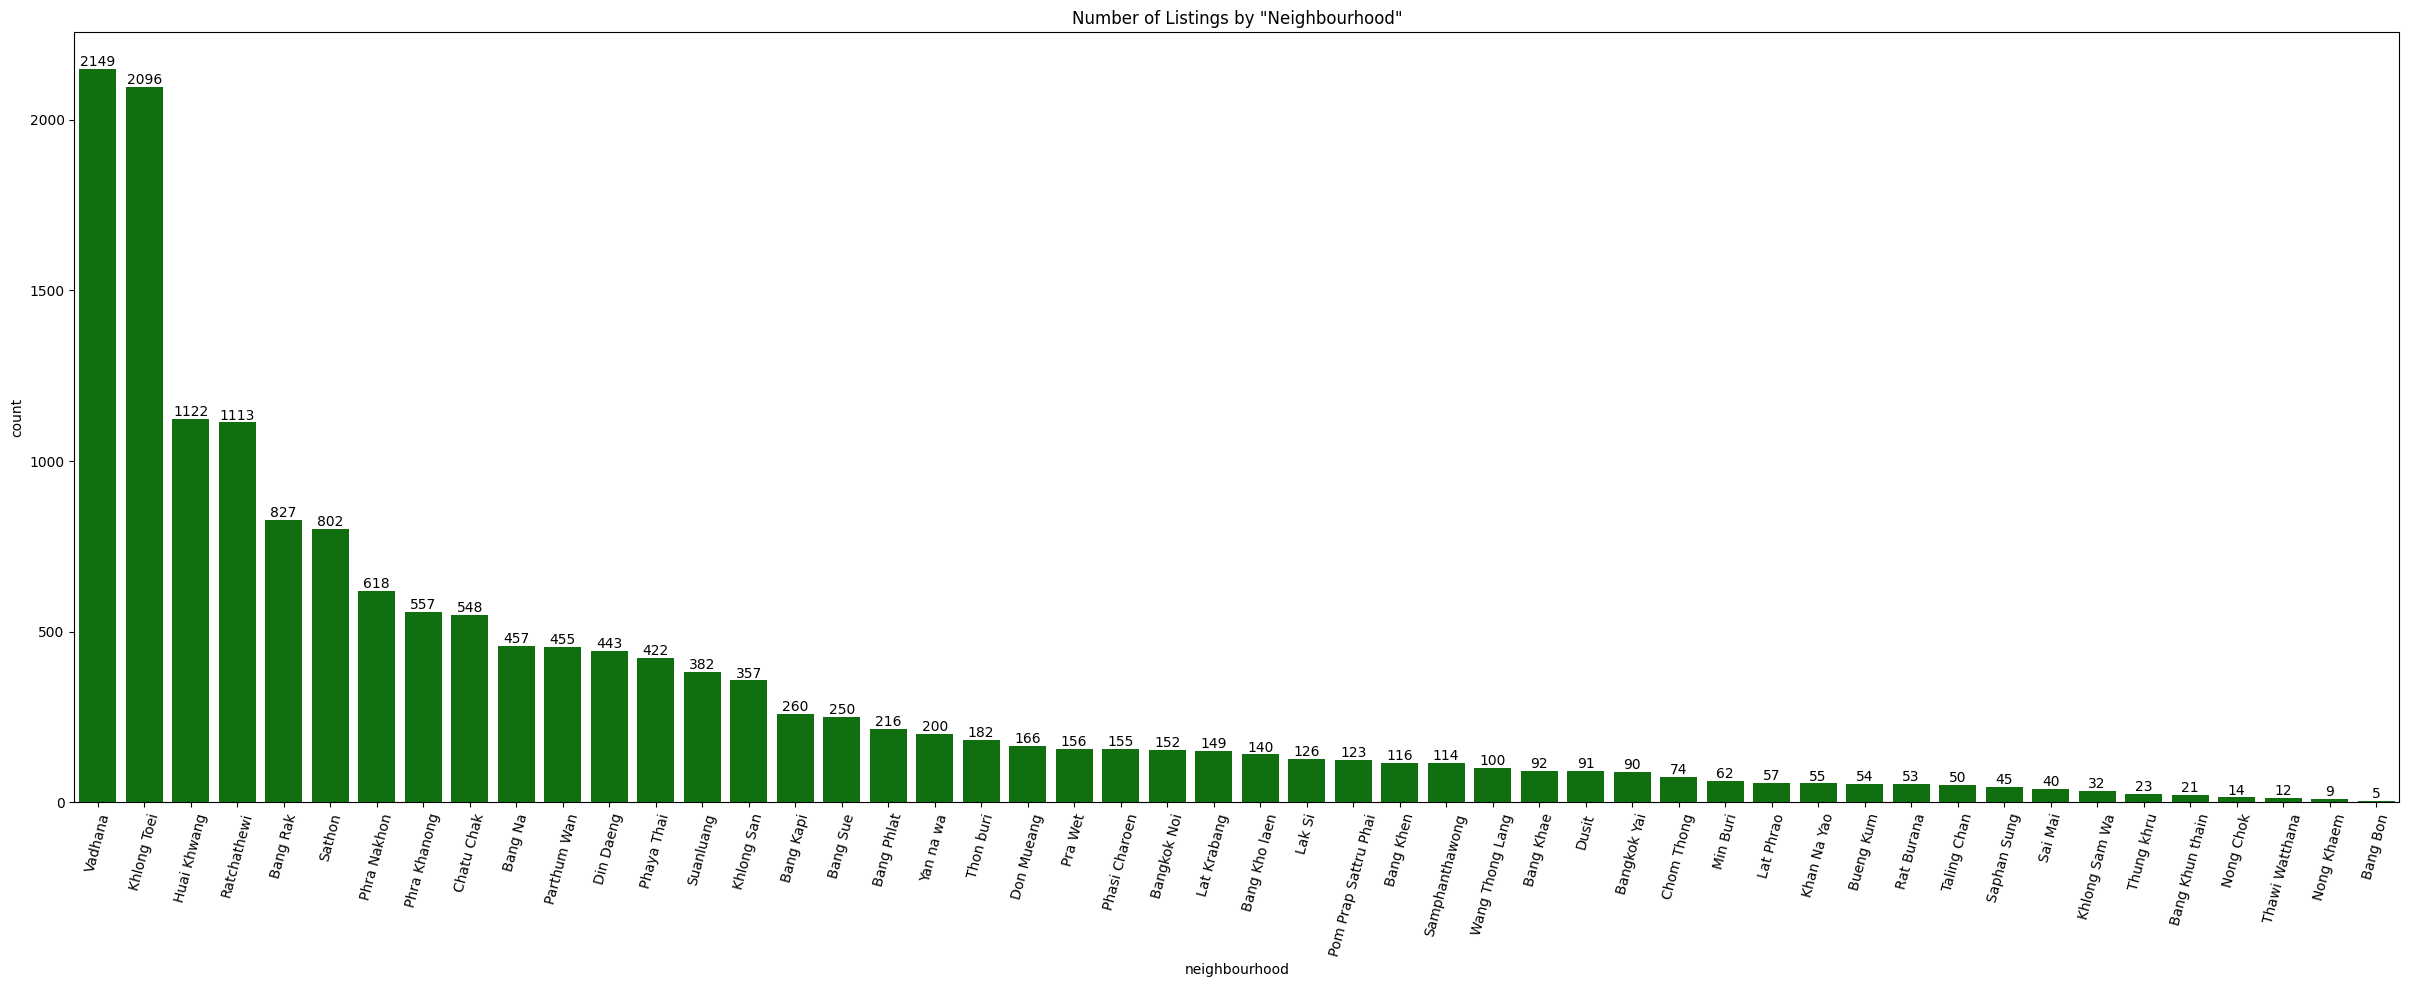

In [30]:
#Display Graphic
plt.figure(figsize = (30,10))
vd = sns.countplot(x='neighbourhood', data=airbnb, order=airbnb['neighbourhood'].value_counts().index,color='green')
abs_values = airbnb['neighbourhood'].value_counts(ascending=False).values
vd.bar_label(container=vd.containers[0], labels=abs_values)

vd.set_title('Number of Listings by "Neighbourhood"')
plt.xticks(rotation=75)
plt.show()

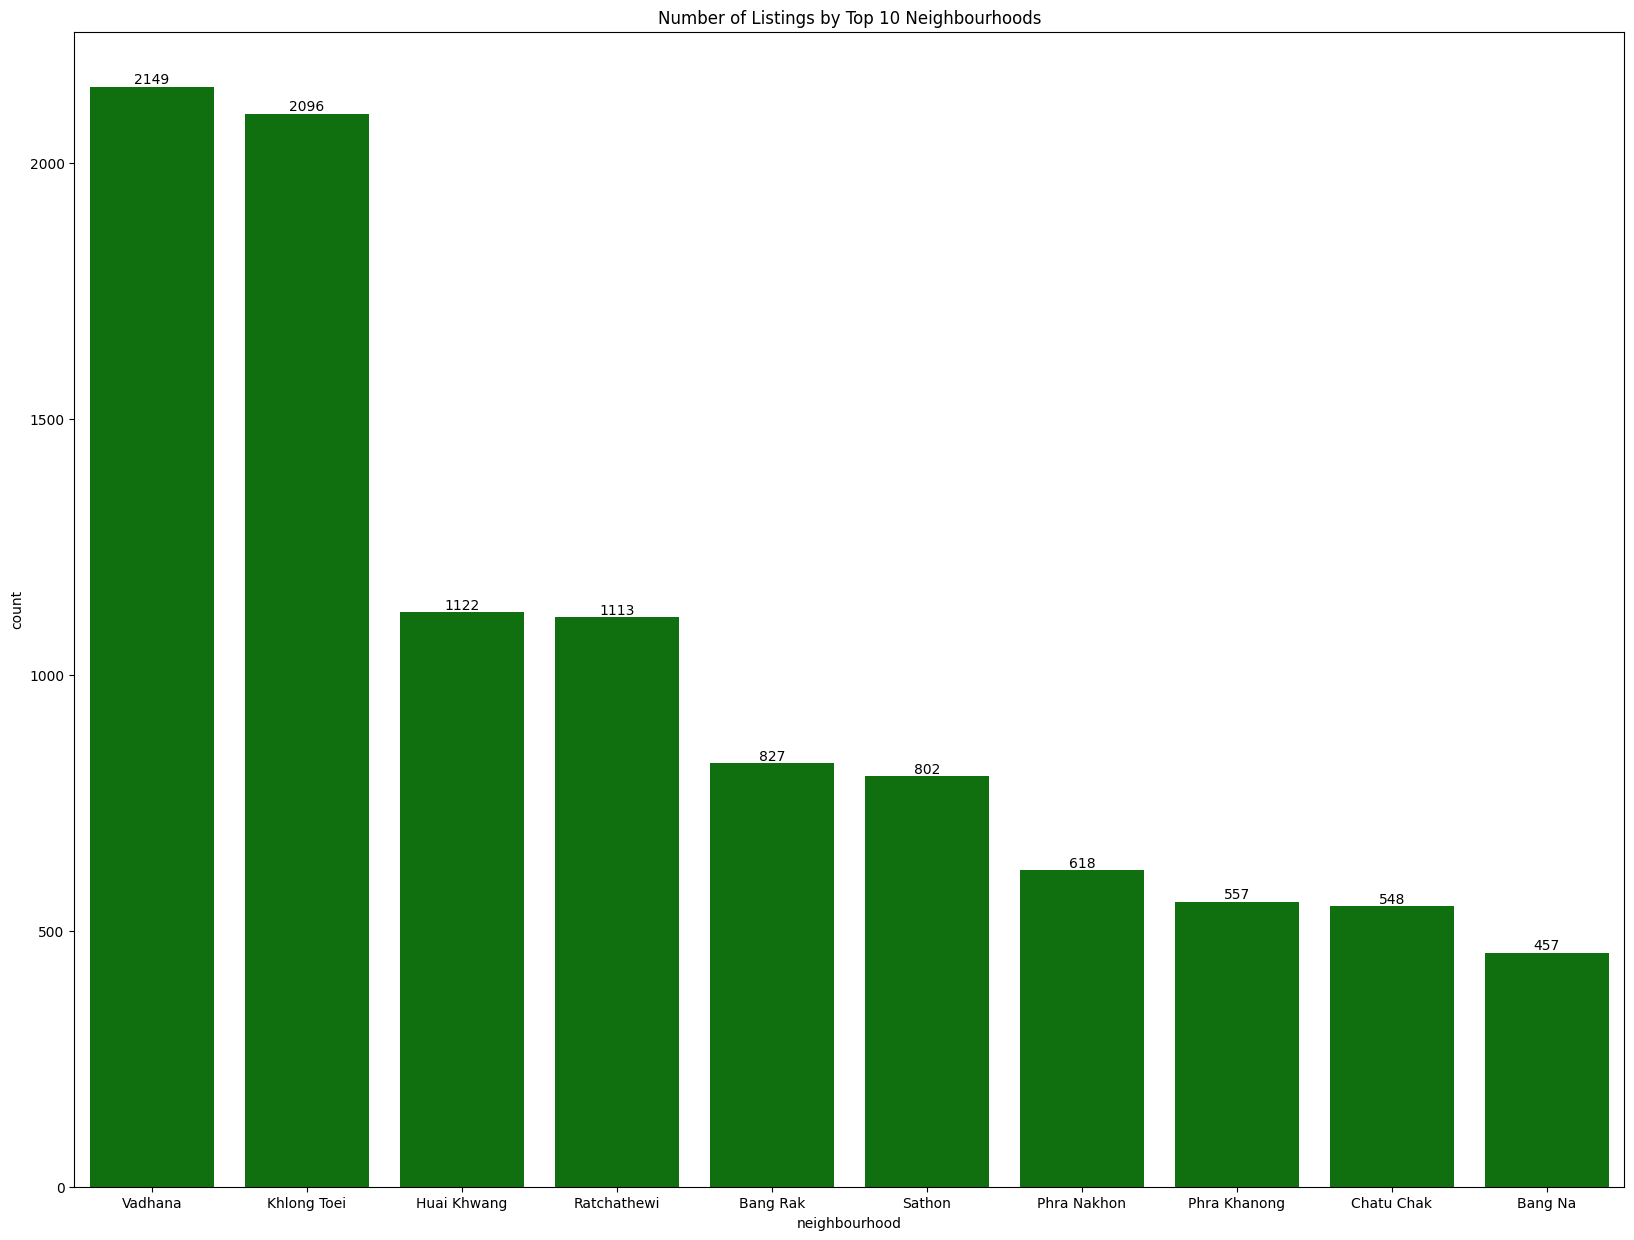

In [90]:
#Melihat 10 Top dari Neighbourhood
Top_Neighbourhoods=airbnb['neighbourhood'].value_counts().head(10).index
Top_Neighbourhood_data=airbnb[airbnb['neighbourhood'].isin(Top_Neighbourhoods)]

plt.figure(figsize=(20, 15))

vd = sns.countplot(x='neighbourhood', data=Top_Neighbourhood_data, order=Top_Neighbourhoods, color ='green')
vd_values = Top_Neighbourhood_data['neighbourhood'].value_counts(ascending=False).values
vd.bar_label(container=vd.containers[0], labels=vd_values)
vd.set_title('Number of Listings by Top 10 Neighbourhoods')

plt.xticks(rotation=0)
plt.show()

In [32]:
#Review total berdasarkan "Neigbhourhood"
Review=airbnb.groupby('neighbourhood')['number_of_reviews'].sum().reset_index().sort_values('number_of_reviews',ascending=False)
Review.head(10)

,neighbourhood,number_of_reviews
22,Khlong Toei,41281
47,Vadhana,37415
41,Sathon,22242
37,Ratchathewi,20692
18,Huai Khwang,18145
8,Bang Rak,17654
31,Phaya Thai,13659
29,Parthum Wan,9103
13,Chatu Chak,8218
33,Phra Nakhon,8142


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Khlong Toei'),
  Text(1, 0, 'Vadhana'),
  Text(2, 0, 'Sathon'),
  Text(3, 0, 'Ratchathewi'),
  Text(4, 0, 'Huai Khwang'),
  Text(5, 0, 'Bang Rak'),
  Text(6, 0, 'Phaya Thai'),
  Text(7, 0, 'Parthum Wan'),
  Text(8, 0, 'Chatu Chak'),
  Text(9, 0, 'Phra Nakhon')])

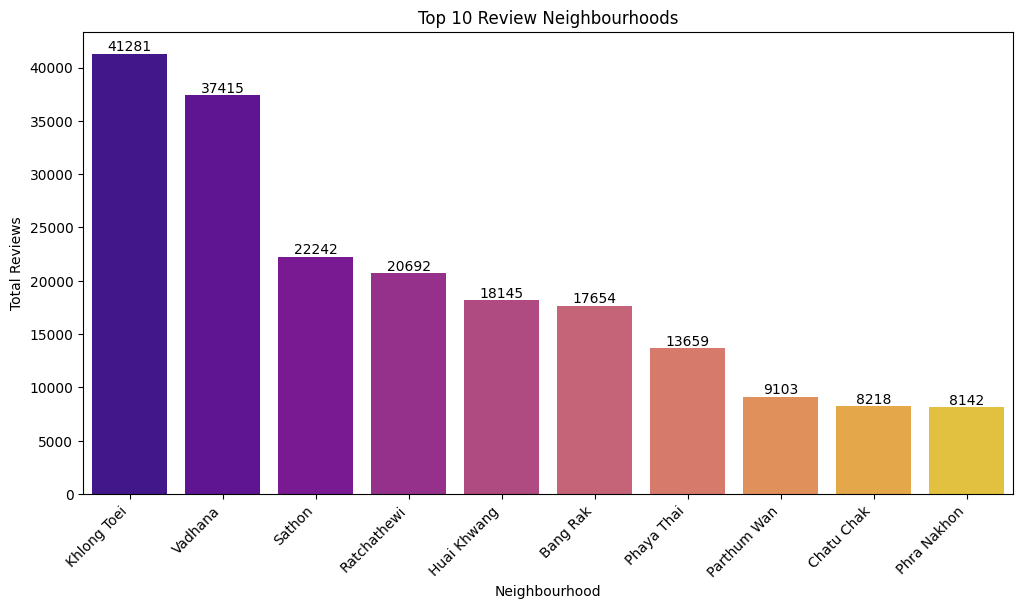

In [33]:
#Display graphic
plt.figure(figsize=(12, 6))
vd = sns.barplot(x='neighbourhood',y='number_of_reviews', data=Review.head(10), palette='plasma')

for p in vd.patches:
    vd.annotate(f'{p.get_height():.0f}',(p.get_x() + p.get_width() / 2.,p.get_height()), ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Review Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Reviews')

plt.xticks(rotation=45, ha='right')

### Analysis based on Room type

In [35]:
Airbnb_Room = airbnb.groupby('room_type')['room_type'].value_counts().reset_index(name='total_rooms').sort_values('total_rooms',ascending=False)

Total = airbnb['room_type'].count()

Airbnb_Room['percentage']=round((Airbnb_Room['total_rooms'] / Total),3)*100
Airbnb_Room

,room_type,total_rooms,percentage
0,Entire home/apt,8900,56.2
2,Private room,5762,36.4
1,Hotel room,648,4.1
3,Shared room,522,3.3


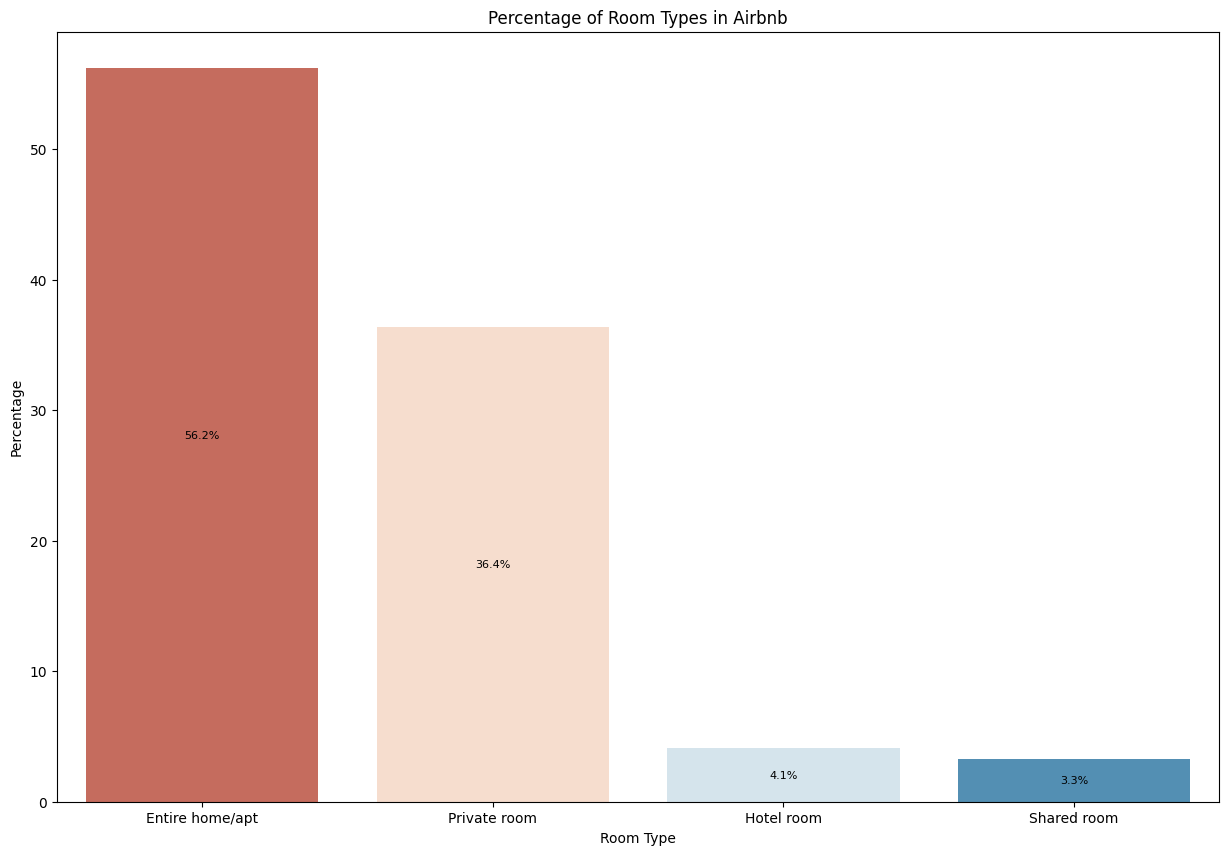

In [36]:
#Melihat Grafik Ratio dari keselurahan data berdasarkan Room Type
plt.figure(figsize=(15, 10))
vd = sns.barplot(x='room_type', y='percentage', data=Airbnb_Room, palette='RdBu')

for i, value in enumerate(round(Airbnb_Room['percentage'], 5)):
    plt.text(i, value/2, f'{value:.1f}%', ha='center', va='center', fontsize=8)

plt.title('Percentage of Room Types in Airbnb')
plt.xlabel('Room Type')
plt.ylabel('Percentage')

plt.show()

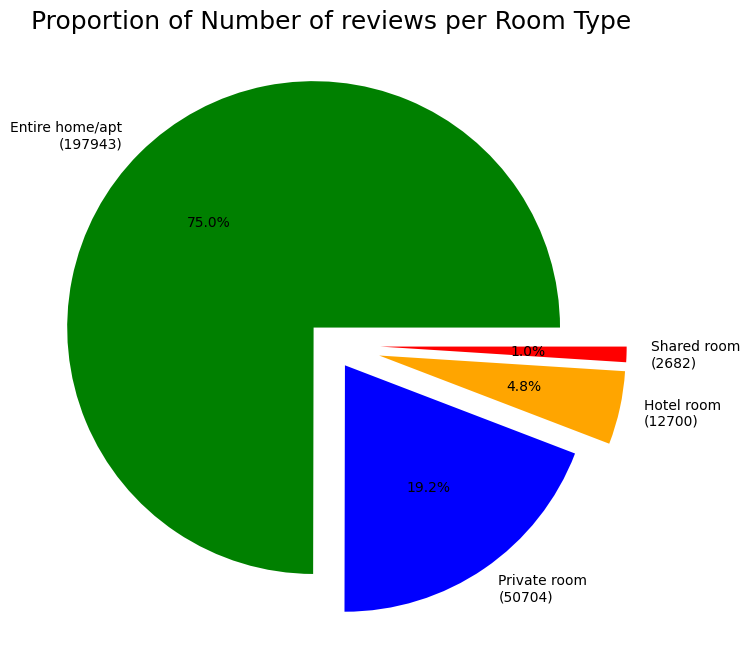

In [45]:
plt.figure(figsize=(15, 8))
explode = (0.1, 0.1, 0.2, 0.2)
labels = [f"{number_of_reviews}\n({sum})" for number_of_reviews, sum in zip(review_roomtype.index, review_roomtype['number_of_reviews'])]
sizes = review_roomtype['number_of_reviews'].values

# Define custom colors
colors = ['green', 'blue', 'orange', 'red']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Proportion of Number of reviews per Room Type', size=18)
plt.show()

In [46]:
filter_1=airbnb[(airbnb['number_of_reviews'].isin([0, None]))]
filter_1

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.0,2,358,0,0.0,0.0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.0,1,365,0,0.0,0.0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.0,3,365,0,0.0,0.0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,0.0,1,365,0,0.0,0.0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,0.0,1,365,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.0,1,362,0,0.0,0.0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.0,14,365,0,0.0,0.0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.0,14,365,0,0.0,0.0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.0,14,365,0,0.0,0.0


In [47]:
display(filter_1['number_of_reviews'].unique())
display(filter_1['last_review'].unique())

array([0], dtype=int64)

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

In [48]:
filter_2=airbnb[(airbnb['last_review'].isin(['NaT']))]
filter_2

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.0,2,358,0,0.0,0.0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.0,1,365,0,0.0,0.0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.0,3,365,0,0.0,0.0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,0.0,1,365,0,0.0,0.0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,0.0,1,365,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.0,1,362,0,0.0,0.0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.0,14,365,0,0.0,0.0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.0,14,365,0,0.0,0.0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.0,14,365,0,0.0,0.0


In [49]:
display(filter_2['number_of_reviews'].unique())
display(filter_2['last_review'].unique())

array([0], dtype=int64)

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

In [50]:
Room_Type_Trend= airbnb.groupby(['last_review(Year)', 'room_type']).size().unstack()
Room_Type_Trend

room_type,Entire home/apt,Hotel room,Private room,Shared room
last_review(Year),,,,
0.0,2332.0,198.0,2922.0,317.0
2012.0,1.0,NaN,NaN,NaN
2013.0,5.0,NaN,2.0,NaN
2014.0,3.0,NaN,6.0,NaN
2015.0,22.0,NaN,26.0,2.0
2016.0,71.0,1.0,67.0,10.0
2017.0,88.0,12.0,146.0,22.0
2018.0,187.0,38.0,241.0,18.0
2019.0,423.0,114.0,422.0,53.0


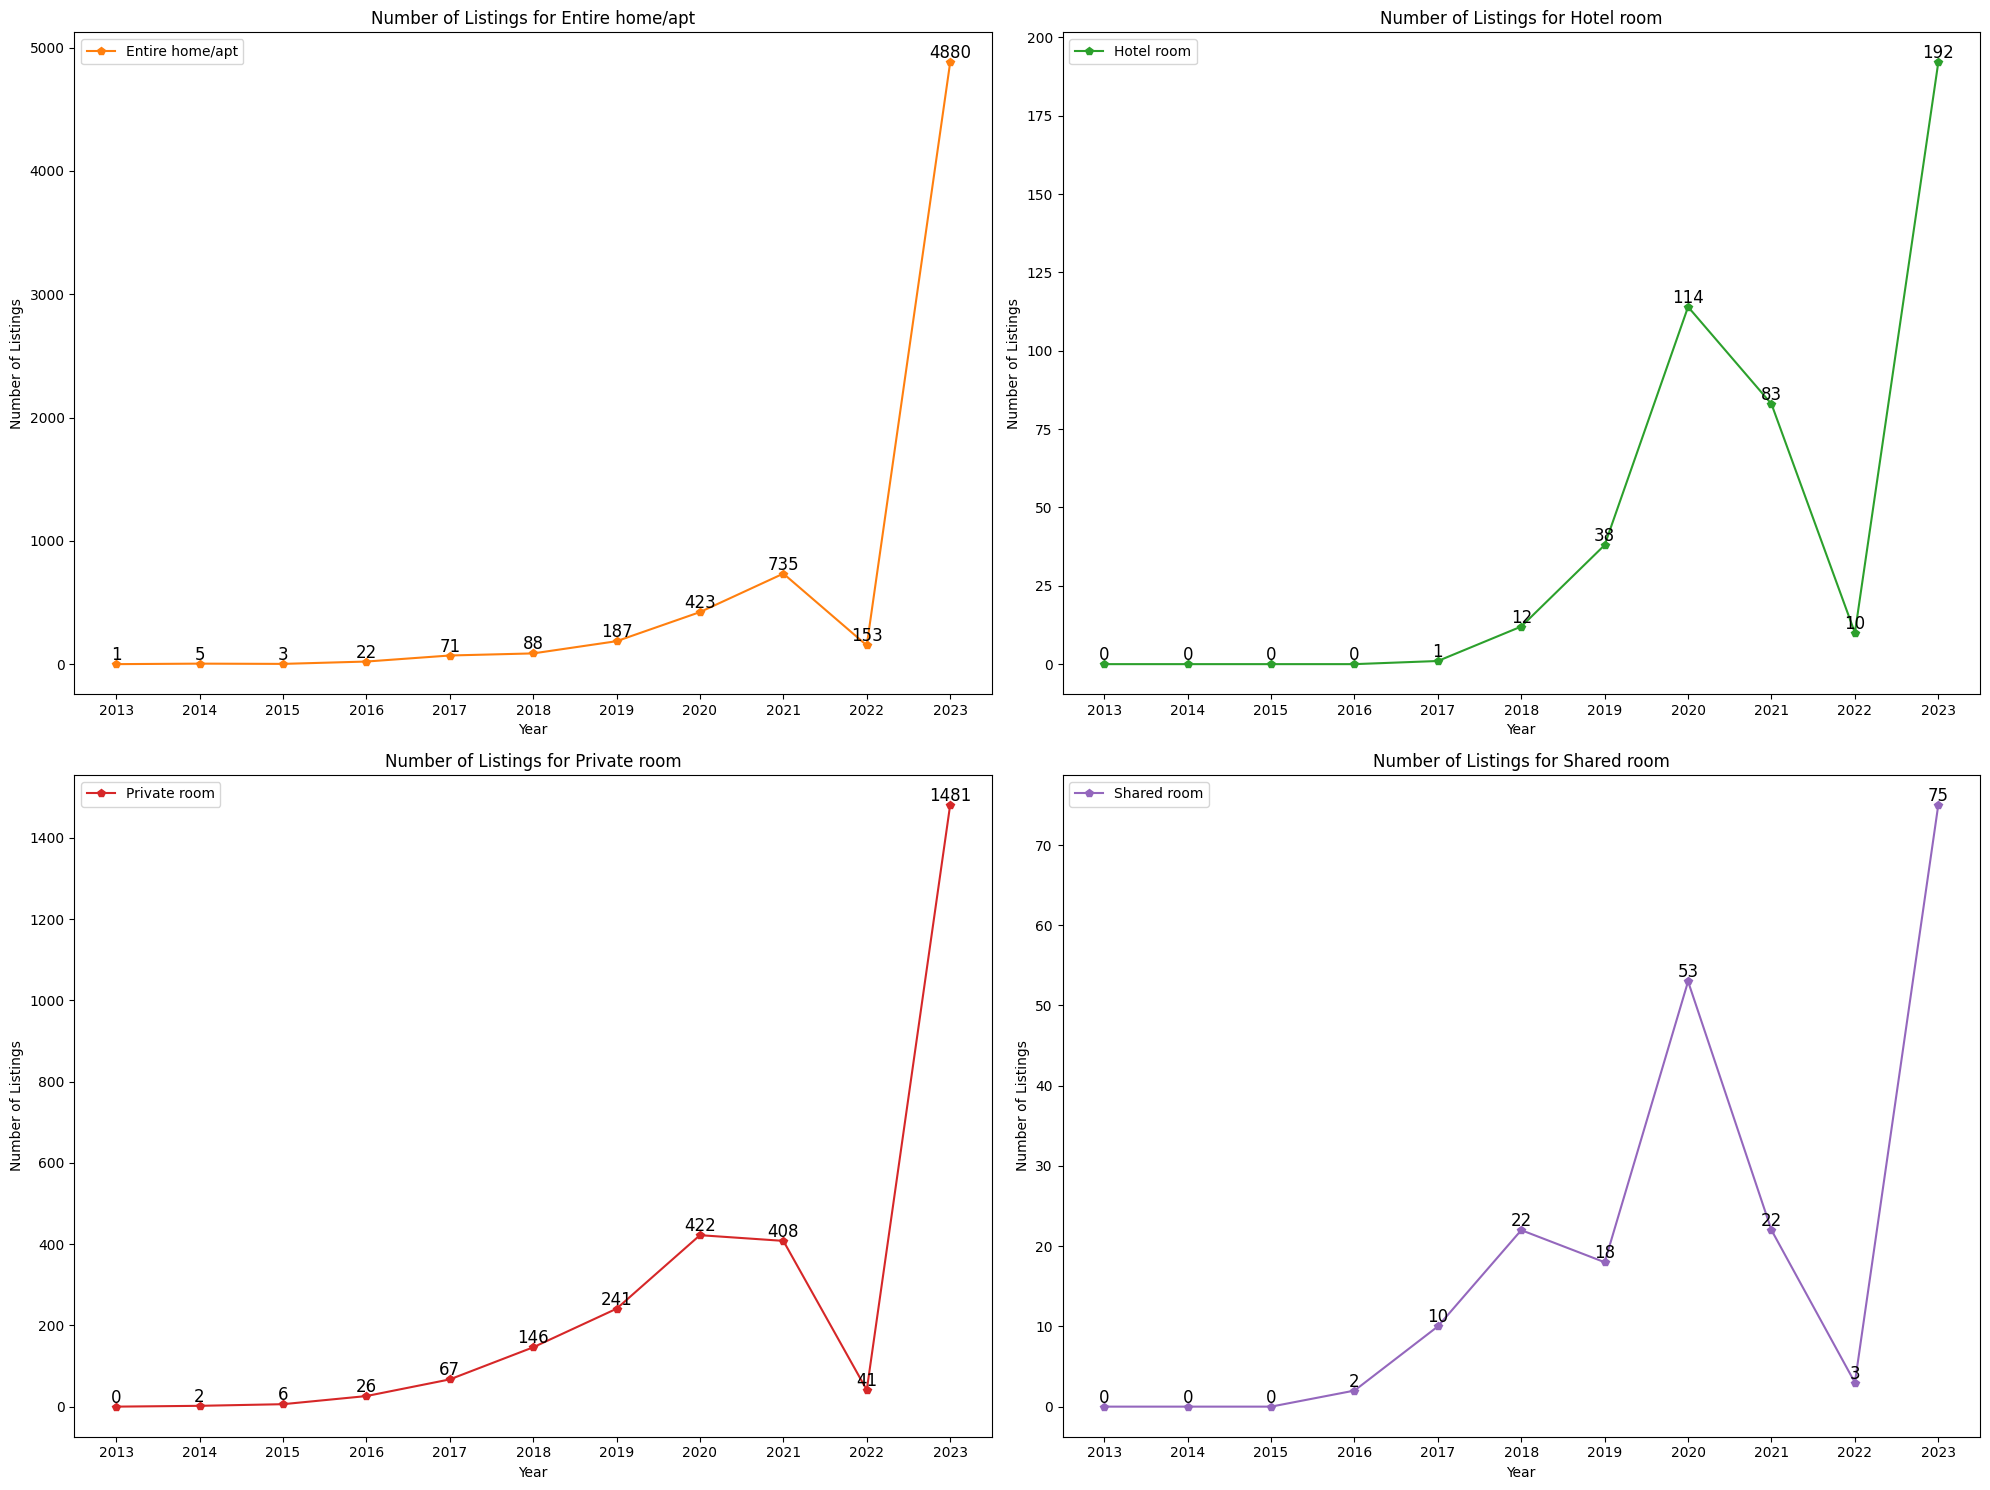

In [58]:

Room_Type_Trend= Room_Type_Trend[Room_Type_Trend.index != 0]
Room_Type_Trend=Room_Type_Trend.fillna(0)
plt.figure(figsize=(20, 15))
room_types = Room_Type_Trend.columns

for i, room_type in enumerate(room_types, 1):
    plt.subplot(2, 2, i)
    color = plt.cm.tab10(i)
    plt.plot(Room_Type_Trend.index + 1, Room_Type_Trend[room_type], marker='p', label=room_type, color=color)

    for x, y in zip(Room_Type_Trend.index + 1, Room_Type_Trend[room_type]):
        plt.text(x, y, str(round(y)), ha='center', va='bottom', fontsize=12)

    plt.xlabel('Year')
    plt.ylabel('Number of Listings')
    plt.title(f'Number of Listings for {room_type}')
    plt.legend()
    plt.xticks(Room_Type_Trend.index + 1)

plt.tight_layout()
plt.show()

### Melihat Pattern based on Hari 

In [59]:

Holiday= airbnb[(airbnb['last_review(Month)'] == 1) | (airbnb['last_review(Month)'] == 12) | (airbnb['last_review(Month)'] == 4) | (airbnb['last_review(Month)'] == 6)]
Daily= airbnb[(airbnb['last_review(Month)'] == 2) | (airbnb['last_review(Month)'] == 3) | (airbnb['last_review(Month)'] == 5) | (airbnb['last_review(Month)'] == 7) | (airbnb['last_review(Month)'] == 8)
                     | (airbnb['last_review(Month)'] == 9) | (airbnb['last_review(Month)'] == 10) | (airbnb['last_review(Month)'] == 11)]

Price_Holiday = Holiday.groupby('last_review(Month)')['price'].median().reset_index()
Price_Daily= daily.groupby('last_review(Month)')['price'].median().reset_index()

Price_Holiday['price'] = Price_Holiday['price'].round().astype(int)
Price_Daily['price'] = Price_Daily['price'].round().astype(int)

display(Price_Holiday)
display(Price_Daily)




,last_review(Month),price
0,1.0,1328
1,4.0,1346
2,6.0,1350
3,12.0,1521


,last_review(Month),price
0,2.0,1200
1,3.0,1200
2,5.0,1129
3,7.0,1300
4,8.0,1300
5,9.0,1290
6,10.0,1300
7,11.0,1350


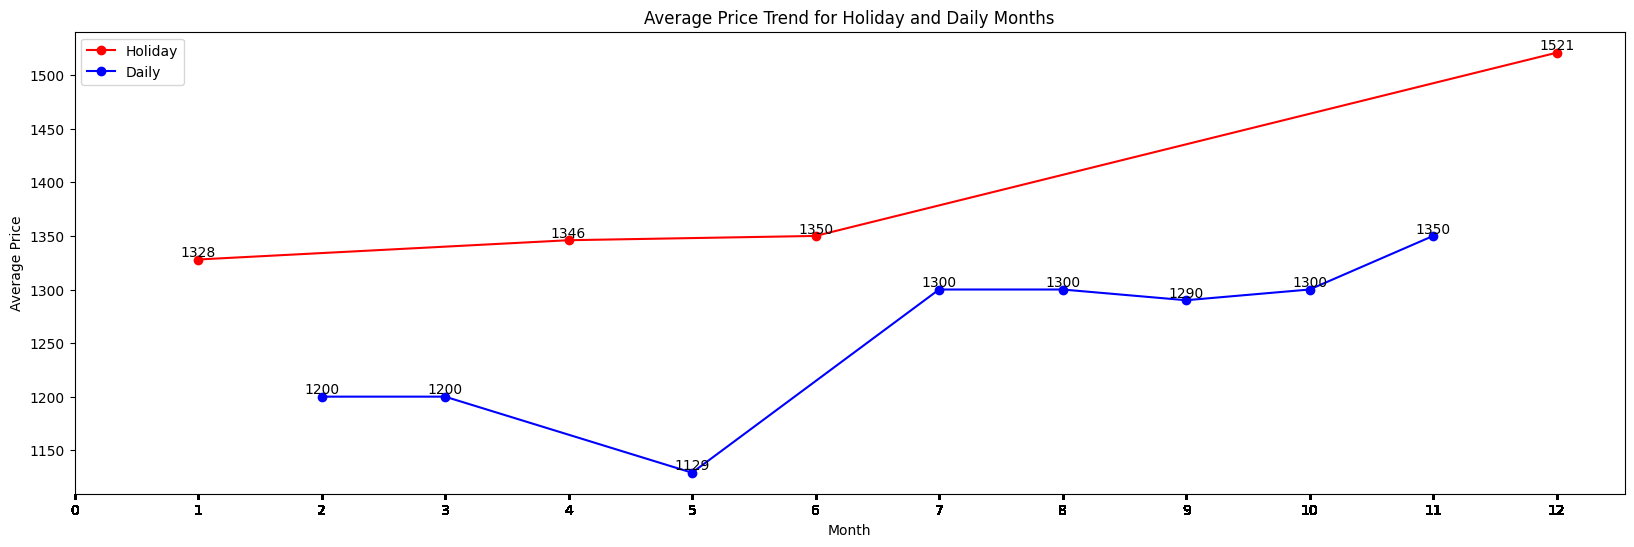

In [62]:
plt.figure(figsize=(20, 6))

plt.plot(Price_Holiday['last_review(Month)'], Price_Holiday['price'], marker='o', linestyle='-', color='r', label='Holiday')
plt.plot(Price_Daily['last_review(Month)'], Price_Daily['price'], marker='o', linestyle='-', color='b', label='Daily')

for i, value in enumerate(Price_Holiday['price']):
    plt.text(Price_Holiday['last_review(Month)'][i], value, str(value), ha='center', va='bottom')

for i, value in enumerate(Price_Daily['price']):
    plt.text(Price_Daily['last_review(Month)'][i], value, str(value), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price Trend for Holiday and Daily Months')
plt.xticks(airbnb['last_review(Month)'])
plt.legend()

plt.show()


* Analisis perbedaan harga antara periode liburan dan non-hari libur menunjukkan bahwa, dalam periode liburan, harga akomodasi cenderung lebih tinggi.
* Teramati tren peningkatan harga yang signifikan selama musim liburan, mengindikasikan adanya peningkatan permintaan akan akomodasi dalam periode tersebut. Peluang ini bisa dimanfaatkan oleh penyedia akomodasi dengan menyesuaikan harga untuk meningkatkan keuntungan mereka.

### Harga

In [63]:
data_availability_0=airbnb[(airbnb['availability_365']==0)&(airbnb['last_review'].notnull())]
display(data_availability_0)
display(f'The total number of properties with availability 0 is {(data_availability_0["id"].count())}')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review(Month),last_review(Year)
51,1019241,Chic two bedroom for Monthly rental,3323622,Phoebe,Bang Rak,13.72687,100.52725,Entire home/apt,2701,30,104,2020-02-20,0.89,1,0,0,2.0,2020.0
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0,8.0,2021.0
104,527553,"Beautiful Apt @ Ratchayothin BTS, Free Wifi",2592798,Nokina,Chatu Chak,13.82841,100.57103,Entire home/apt,1004,2,24,2018-07-22,0.19,2,0,0,7.0,2018.0
141,1244333,"Private Room@Chatuchak,BTS,JJ market,DMK airport",2087671,Apipu,Phaya Thai,13.79221,100.54631,Private room,399,1,33,2020-03-15,0.78,1,0,0,3.0,2020.0
152,1316688,Contemporary Modern Duplex - Thonglor,5394070,Eva,Khlong Toei,13.72242,100.57962,Entire home/apt,1489,30,81,2022-10-07,0.72,1,0,3,10.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14300,728741646918472189,"Lux Studio in High-Rise BKK, Gym&Spa w/Breakfast",26620868,Gilles,Vadhana,13.72419,100.58688,Entire home/apt,1190,2,1,2022-10-24,0.45,34,0,1,10.0,2022.0
14322,729626149936269321,"Embassies Area, close to BTS, breakfast included",26620868,Gilles,Khlong Toei,13.73673,100.55583,Entire home/apt,1190,2,1,2022-11-14,0.67,34,0,1,11.0,2022.0
14348,730341564629399745,"Studio near Asok BTS and Malls, Breakfast incl.",26620868,Gilles,Khlong Toei,13.73454,100.56192,Entire home/apt,1190,2,1,2022-11-03,0.54,34,0,1,11.0,2022.0
14349,730351763605367908,"Pop Double, Terminal 21-Sukhumvit, w/ Breakfast",26620868,Gilles,Khlong Toei,13.73401,100.55977,Entire home/apt,1190,1,1,2022-10-10,0.37,34,0,1,10.0,2022.0


'The total number of properties with availability 0 is 601'

In [64]:
data_review_month = data_availability_0.groupby(data_availability_0['last_review'].dt.year)['room_type'].size()
data_review_month = data_review_month.reset_index()

total_listings = data_review_month['room_type'].sum()
data_review_month['percentage'] = (data_review_month['room_type'] / total_listings) * 100
data_review_month

,last_review,room_type,percentage
0,2014,1,0.166389
1,2015,1,0.166389
2,2016,6,0.998336
3,2017,16,2.662230
4,2018,45,7.487521
5,2019,110,18.302829
6,2020,232,38.602329
7,2021,34,5.657238
8,2022,156,25.956739


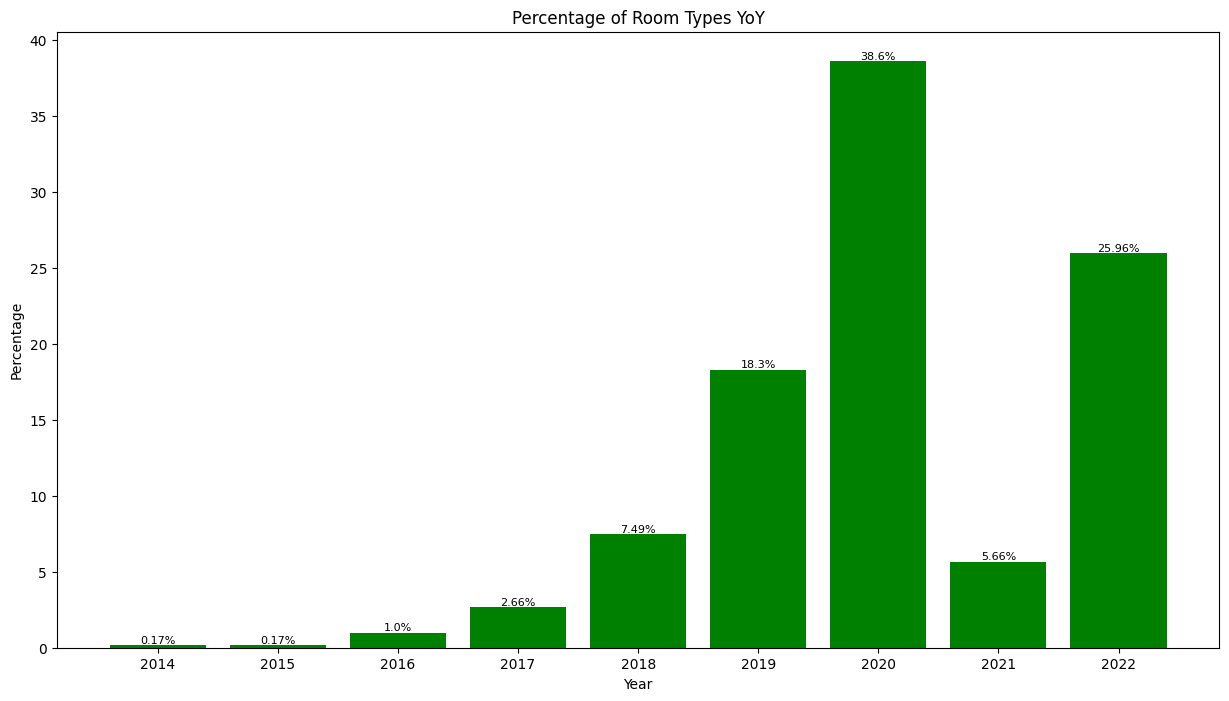

In [70]:
plt.figure(figsize=(15, 8))
bars = plt.bar(data_review_month['last_review'], data_review_month['percentage'], color='green')

# Add Values with percentage symbol
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval, 2)}%", ha='center', va='bottom', fontsize=8)

# Add lable and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Room Types YoY')
plt.xticks(data_review_month['last_review'])

# Display graphic
plt.show()

Ada tren peningkatan jumlah properti yang tidak tersedia untuk disewa selama beberapa tahun terakhir di Thailand. Puncaknya terjadi pada tahun 2020 yaitu saat Covid-19. Banyaknya resiko di tahun itu membuat calon wisatawan atau bahkan pemilik properti untuk tidak menyewa properti mereka demi mencegah resiko yang akan terjadi di kemudian hari.

### Host

In [71]:
property_host = airbnb.groupby('host_name')['id'].size().reset_index(name='total_property').sort_values('total_property', ascending=False)
top_10_property_host = property_host.head(10)
top_10_property_host 

,host_name,total_property
807,Curry,228
2574,Noons,98
1535,K,91
3257,Pornchai,63
398,Bee,62
914,Dusadee,62
932,Ed,60
84,Alex,60
2314,Nana,57
2007,Ludoping,56


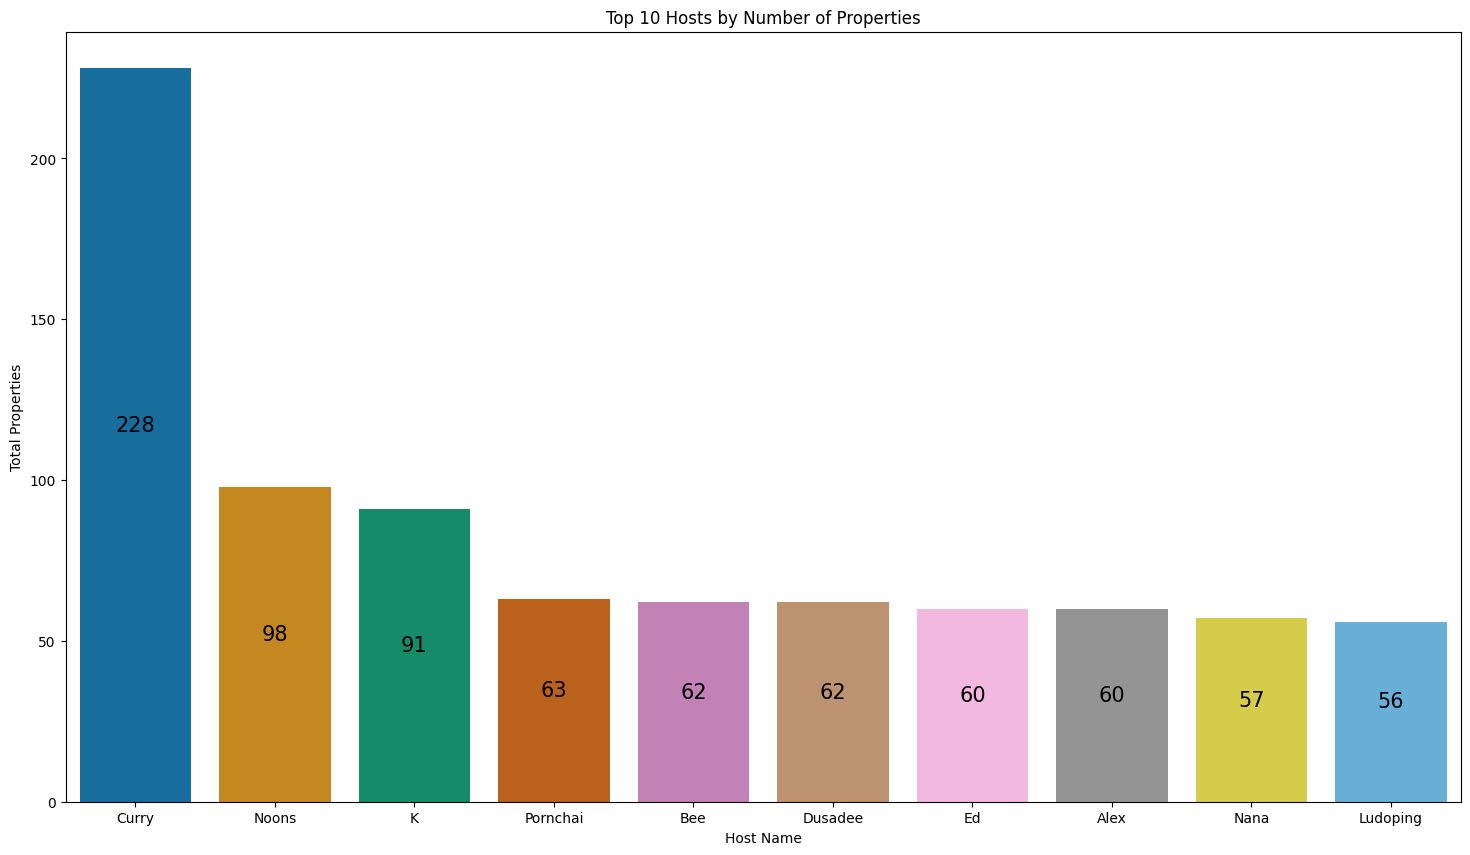

In [75]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='host_name', y='total_property', data=top_10_property_host, palette='colorblind')

for i, value in enumerate(top_10_property_host['total_property']):
    plt.text(i, value/2, str(value), ha='center', va='bottom', fontsize=15)

ax.set_title('Top 10 Hosts by Number of Properties')
plt.xlabel('Host Name')
plt.ylabel('Total Properties')

plt.xticks(rotation=0, ha='center')
plt.show()

# Kesimpulan

**Top Neihbhourhood** 
* Lima distrik yang paling populer di Bangkok, yaitu Vandhana, Khlong Toei, Huai Khwang, Ratchathewi, dan Bang Rak, menawarkan pengalaman yang beragam dan kaya bagi para wisatawan.

**Room Type** 
* Di platform Airbnb, terdapat empat jenis tipe kamar yang tersedia, yaitu: seluruh rumah/apartemen, kamar pribadi, kamar hotel, dan kamar bersama. Tipe kamar yang paling dominan adalah seluruh rumah/apartemen, yang menyumbang proporsi sebesar 56,2% dari total tipe keamar yang ditawarkan, menjadikannya pilihan yang paling banyak diminati oleh pengguna platform.

**Toop Review berdasarkan 5 distrik ter-populer**
* Tipe kamar yang paling diminati dengan jumlah ulasan tertinggi di lima distrik populer di Bangkok, yaitu Vadhana, Khlong Toei, Huai Khwang, Ratchathewi, dan Bang Rak, adalah Eniter Home/Apt.

**Top Review Berdasarkan Room Type**
* Entire home/Apt memiliki presentase paling besar ketimbang room tipe lainnya. Properti tipe ini memiliki banyak demand dimana menguasi sebanya 75% dari lainnya. Trend ini bisa menjadi sebuah acuan dalam melakukan pemasaran yang lebih untuk tipe ruangan dan memberika customer statisfaction yang baijk.

**Trend Harga Holiday dan Daily** 
* Rata-rata harga akan meninagkat ketika di hari Holiday. Dimana terus mengalami peningkatan ketika akan menuju ke akhir tahu.

**Host** 
* Pemilik dengan nama Curry secara signifikan mendominasi pansa pasar dengan memiliki sejumlah properti yang cukup besar. Trend ini mencerminkan peran yang kuat dan pengaruh yang dimiliki oleh pemilik tersebut dalam industri properti sewaan di kota Bangkok. Keberhasilan dan dominasi Curry dalam kepemilikan properti dapat menjadi subjek minat dan penelitian yang menarik, serta menggambarkan dinamika yang unik dalam ekosistem bisnis properti Airbnb di Bangkok.


# Rekomendasi

**Review** 
* Based on Review, bisa dilakukan proses lebih. Yaitu dengan membuat analisa dari review customer dengan bekerja sama dengan vendor diluar untuk membuat strategy berdasarkan kepuasan pelanggan.
* Mempertahankan atau memperbaiki dari kepuasan pelanggan. Tujuannya adalah memperoleh rating yang bagus sehingga untuk calon cust lebih tepat sasaran. Selain itu repeat order sangat penting dalam perusahaan memperoleh revenue, sehingga dapat membentuk "Customer Loyality".
* Kepercayaan customer juga tidak kalah penting. Platform yang dikenal dan dipercaya akan membuat ketertarikan lebih.

**Room Type** 
* Dari analisa kita, dapat di katakan bahwa Entire Home/Apt adalah room tipe paling banyak. Dari sini perusahaan bisa lebih memfokuskan untuk melakukan sebuah strategy business dan fokus ke main LOB "Line of Business".

**Toop Review berdasarkan 5 distrik ter-populer**
* Top populer di Bangkok, yaitu Vadhana, Khlong Toei, Huai Khwang, Ratchathewi, dan Bang Rak, adalah Eniter Home/Apt.

**Trend Harga Holiday dan Daily** 
* Point ini juga bisa menjadi sebuah acuan, dimana kita bisa melakukan strategy untuk meraup income lebih di hari-hari tertentu. Bisa melakukan pemasaran yang lebih luas tentunya dengan target atau sasaran yang tepat sehingga tidak membuat bad deb expense meningkat dalam laporan keuangan.

